# Query osmnx

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import osmnx as ox

import os

import sys

# from sklearn.cluster import DBSCAN

sys.path.append("/app")

# import dataloader as loader

# from constants import DATA_PATH

# import sqlite3 as sql
import pickle

# from utils import detect_outliers_iqr,detect_outliers_zscore,detect_outliers_dbscan


import seaborn as sns

<IPython.core.display.Javascript object>

In [ ]:
import osmnx as ox

In [3]:
from constants import DATA_PATH

<IPython.core.display.Javascript object>

In [4]:
from db_utils import get_engine, get_table_creation_query
import os

<IPython.core.display.Javascript object>

## Connect to Database

In [5]:
user = os.getenv("POSTGRES_USER")
password = os.getenv("POSTGRES_PASSWORD")
host = os.getenv("POSTGRES_HOST")

<IPython.core.display.Javascript object>

In [6]:
engine = get_engine(user, password, host)

<IPython.core.display.Javascript object>

## Load data

## Find points of interest

In [7]:
NUM_METERS_IN_MILES = 1609.34

<IPython.core.display.Javascript object>

In [8]:
place = "Greater London"

<IPython.core.display.Javascript object>

## Parks

In [9]:
%%time
gdf_parks = ox.geometries_from_place(place, tags={'leisure':"park"})

CPU times: user 3.24 s, sys: 5.3 ms, total: 3.25 s
Wall time: 3.3 s


<IPython.core.display.Javascript object>

In [10]:
park_centroids = gdf_parks.geometry.centroid
gdf_parks["latitude"] = park_centroids.y
gdf_parks["longitude"] = park_centroids.x

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-fff853817d7b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  park_centroids = gdf_parks.geometry.centroid


<IPython.core.display.Javascript object>

In [11]:
gdf_parks = gdf_parks.to_crs("EPSG:27700")

<IPython.core.display.Javascript object>

In [12]:
gdf_parks.geometry.area

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
3322    37928.514656
3323    26002.734846
3324     6663.842641
3325    63208.355456
3326      793.933203
Length: 3327, dtype: float64

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

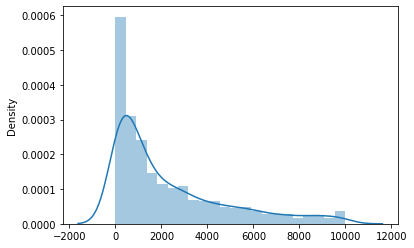

<IPython.core.display.Javascript object>

In [13]:
sns.distplot(gdf_parks.geometry.area[gdf_parks.geometry.area < 10_000])

In [14]:
min_area = 10_000

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

In [15]:
park_filter = gdf_parks.geometry.area > min_area

<IPython.core.display.Javascript object>

In [16]:
park_filter.value_counts()

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    2079
True     1248
dtype: int64

<IPython.core.display.Javascript object>

In [17]:
park_filter2 = gdf_parks.name.notna()

<IPython.core.display.Javascript object>

In [18]:
park_filter2.value_counts()

True     1746
False    1581
Name: name, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
gdf_parks = gdf_parks[(gdf_parks.geometry.area > min_area) & park_filter2]

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

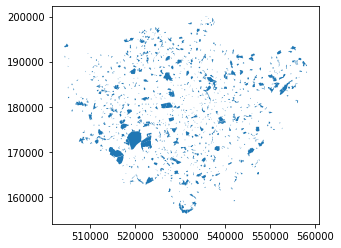

<IPython.core.display.Javascript object>

In [20]:
gdf_parks.plot()

In [21]:
gdf_parks["opening_hours"].isna().value_counts()

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True     976
False     33
Name: opening_hours, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
gdf_parks[
    ["unique_id", "osmid", "element_type", "opening_hours", "fixme", "geometry", "name"]
]

,unique_id,osmid,element_type,opening_hours,fixme,geometry,name
31,way/2903398,2903398,way,NaN,NaN,"POLYGON ((533689.081 196157.229, 533687.358 19...",Bush Hill Park
32,way/2914274,2914274,way,NaN,NaN,"POLYGON ((525319.394 190164.222, 525334.781 19...",Stephens House & Grounds
33,way/2926821,2926821,way,sunrise-sunset,NaN,"POLYGON ((529803.487 195154.482, 529779.236 19...",Oakwood Park
34,way/2939009,2939009,way,NaN,NaN,"POLYGON ((532403.124 196417.371, 532389.753 19...",Enfield Town Park
35,way/2939140,2939140,way,NaN,NaN,"POLYGON ((526527.495 196443.890, 526511.153 19...",Victoria Park
...,...,...,...,...,...,...,...
3320,relation/12353846,12353846,relation,NaN,NaN,"POLYGON ((507203.884 180508.115, 507220.367 18...",Stockley Country Park
3321,relation/12370600,12370600,relation,NaN,NaN,"MULTIPOLYGON (((544761.404 179745.688, 544709....",Gallions Park
3322,relation/12455180,12455180,relation,NaN,NaN,"POLYGON ((504373.455 191000.692, 504389.995 19...",Belfry Avenue Open Space
3323,relation/12541078,12541078,relation,NaN,NaN,"POLYGON ((523395.871 197018.002, 523494.400 19...",Barnet Countryside Centre


<IPython.core.display.Javascript object>

In [23]:
gdf_parks = (
    gdf_parks.reset_index()
    .drop(columns="index")
    .reset_index()
    .rename(columns={"index": "id"})
)

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

### Save parks

In [24]:
output_dir = os.path.join(DATA_PATH, "pois")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

<IPython.core.display.Javascript object>

In [25]:
gdf_parks[["id", "geometry"]].to_file(os.path.join(output_dir, "parks.shp"))

<IPython.core.display.Javascript object>

In [26]:
with engine.connect() as conn:
    conn.execute(f"CREATE SCHEMA IF NOT EXISTS pois")

    gdf_parks[
        [
            "id",
            "unique_id",
            "osmid",
            "element_type",
            "opening_hours",
            "fixme",
            "name",
            "latitude",
            "longitude",
        ]
    ].to_sql("parks", schema="pois", index=False, con=conn, if_exists="replace")

/usr/local/lib/python3.8/site-packages/pandas/io/sql.py:1429: SADeprecationWarning: The Connection.run_callable() method is deprecated and will be removed in a future release.  Invoke the callable function directly, passing the Connection. (deprecated since: 1.4)
  return self.connectable.run_callable(
/usr/local/lib/python3.8/site-packages/pandas/io/sql.py:718: SADeprecationWarning: Table.tometadata() is renamed to Table.to_metadata() (deprecated since: 1.4)
  self.table = self.table.tometadata(self.pd_sql.meta)


<IPython.core.display.Javascript object>

In [27]:
with engine.connect() as conn:
    conn.execute("CREATE INDEX id_parks_idx ON pois.parks (id);")

<IPython.core.display.Javascript object>

## Stations

In [28]:
%%time
gdf_stations = ox.geometries_from_place(place,tags={"railway":"station"})

CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.51 s


<IPython.core.display.Javascript object>

In [29]:
gdf_stations["latitude"] = gdf_stations.geometry.y
gdf_stations["longitude"] = gdf_stations.geometry.x

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

In [30]:
gdf_stations = gdf_stations.to_crs("EPSG:27700")

<IPython.core.display.Javascript object>

In [31]:
gdf_stations.network.value_counts()

London Underground                                                                     213
National Rail                                                                          193
London Overground                                                                       62
Docklands Light Railway                                                                 40
National Rail;London Overground                                                         18
London Underground;London Overground                                                    15
TfL Rail                                                                                12
National Rail;London Underground                                                        11
National Rail;London Underground;London Overground                                       8
National Rail;TfL Rail                                                                   7
Heathrow Airport                                                                         5

<IPython.core.display.Javascript object>

In [32]:
to_ignore = ["London Transport Miniature Railway", "Heathrow Airport"]

<IPython.core.display.Javascript object>

In [33]:
gdf_stations = gdf_stations[~gdf_stations.network.isin(to_ignore)]

<IPython.core.display.Javascript object>

In [34]:
gdf_stations = (
    gdf_stations.reset_index()
    .drop(columns="index")
    .reset_index()
    .rename(columns={"index": "id"})
)

<IPython.core.display.Javascript object>

In [35]:
gdf_stations

,id,unique_id,osmid,element_type,fare_zone,line,name,name:ru,network,public_transport,...,ref:nalco,source:alt_name,name:pa,wheelchair:note,landuse,man_made,name:la,shelter,latitude,longitude
0,0,node/780856,780856,node,2,Hammersmith & City;Circle,Shepherd's Bush Market,Шепердс-Буш-Маркет,London Underground,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.506070,-0.226313
1,1,node/1256794,1256794,node,NaN,NaN,West Drayton,NaN,National Rail;TfL Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.509736,-0.471829
2,2,node/2013971,2013971,node,4,Northern,Finchley Central,NaN,London Underground,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.600836,-0.192318
3,3,node/9780241,9780241,node,NaN,NaN,St Mary Cray,NaN,National Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.394738,0.105719
4,4,node/13884199,13884199,node,NaN,NaN,Mill Hill Broadway,NaN,National Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.612643,-0.248872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,586,node/7860903110,7860903110,node,NaN,NaN,East Dulwich,NaN,National Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.461037,-0.080798
587,587,node/7862969803,7862969803,node,NaN,NaN,South Greenford,NaN,National Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.533203,-0.336438
588,588,node/7862969806,7862969806,node,NaN,NaN,Castle Bar Park,NaN,National Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.522867,-0.331502
589,589,node/7862969807,7862969807,node,NaN,NaN,Drayton Green,NaN,National Rail,station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.516385,-0.330194


<IPython.core.display.Javascript object>

In [36]:
gdf_stations.columns.tolist()

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['id',
 'unique_id',
 'osmid',
 'element_type',
 'fare_zone',
 'line',
 'name',
 'name:ru',
 'network',
 'public_transport',
 'railway',
 'source_ref',
 'station',
 'subway',
 'wheelchair',
 'wikidata',
 'wikipedia',
 'geometry',
 'naptan:AtcoCode',
 'operator',
 'ref:crs',
 'old_name',
 'toilets:wheelchair',
 'source',
 'train',
 'platforms',
 'light_rail',
 'public_transport:version',
 'tram',
 'source:name',
 'start_date',
 'wikimedia_commons',
 'network:subway',
 'network:train',
 'source:network',
 'ref:stanox',
 'ref:tiploc',
 'addr:street',
 'electrified',
 'name:fr',
 'wheelchair:description',
 'loc_name',
 'name:da',
 'tracks',
 'postal_code',
 'air_conditioning',
 'internet_access',
 'internet_access:fee',
 'building',
 'addr:city',
 'addr:postcode',
 'baby_feeding',
 'website',
 'name:he',
 'note',
 'layer',
 'owner',
 'name:nl',
 'naptan:Bearing',
 'naptan:CommonName',
 'naptan:Indicator',
 'naptan:verified',
 'survey:date',
 'alt_name',
 'usage',
 'tourism',
 'operator:sub

<IPython.core.display.Javascript object>

In [37]:
gdf_stations[["id", "geometry"]].to_file(
    os.path.join(DATA_PATH, "pois", "stations.shp")
)

<IPython.core.display.Javascript object>

In [38]:
with engine.connect() as conn:
    gdf_stations[
        [
            "id",
            "unique_id",
            "osmid",
            "fare_zone",
            "opening_hours",
            "name",
            "line",
            "network",
            "latitude",
            "longitude",
        ]
    ].to_sql("stations", index=False, schema="pois", con=conn, if_exists="replace")

/usr/local/lib/python3.8/site-packages/pandas/io/sql.py:1429: SADeprecationWarning: The Connection.run_callable() method is deprecated and will be removed in a future release.  Invoke the callable function directly, passing the Connection. (deprecated since: 1.4)
  return self.connectable.run_callable(
/usr/local/lib/python3.8/site-packages/pandas/io/sql.py:718: SADeprecationWarning: Table.tometadata() is renamed to Table.to_metadata() (deprecated since: 1.4)
  self.table = self.table.tometadata(self.pd_sql.meta)


<IPython.core.display.Javascript object>

In [39]:
with engine.connect() as conn:
    conn.execute("CREATE INDEX id_stations_idx ON pois.stations (id);")

<IPython.core.display.Javascript object>

## Get Walking Network

In [ ]:
%%time
graph = ox.graph_from_place(place,buffer_dist = NUM_METERS_IN_MILES*1,network_type="walk")

ox.save_graphml(os.path.join(DATA_PATH,"roadnet_greaterlondon_walking.graphml"))